In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate affine data
x = np.linspace(-1,2)
y = 0.2*x + 2
x += np.random.randn(*x.shape)*0.0 #*1e-3
y += np.random.randn(*y.shape)*10**-0.6

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()
/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: `rcond` pa

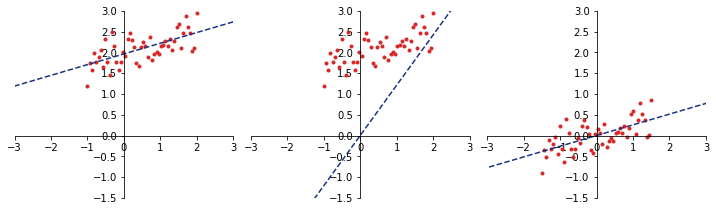

In [4]:
fig = plt.figure(figsize=(10,3))

axes = []

# Fit to affine model
axes.append(fig.add_subplot(1,3,1))
plt.plot(x,y,'.',c='tab:red')
a, b = np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y)[0]
plt.plot(np.arange(-4,5),a*np.arange(-4,5)+b,color=(0.1, 0.2, 0.5),linestyle='--')
plt.xlim([-3,3])
plt.ylim([-1.5,3])

# Fit to linear model
axes.append(fig.add_subplot(1,3,2))
plt.plot(x,y,'.',c='tab:red')
a = np.linalg.lstsq(x[:,np.newaxis], y)[0]
plt.plot(np.arange(-4,5),a*np.arange(-4,5),color=(0.1, 0.2, 0.5),linestyle='--')
plt.xlim([-3,3])
plt.ylim([-1.5,3])

# Fit centered data to linear model
axes.append(fig.add_subplot(1,3,3))
μx = np.mean(x)
μy = np.mean(y)
xcent = x - μx
ycent = y - μy
plt.plot(xcent,ycent,'.',c='tab:red')
a = np.linalg.lstsq(xcent[:,np.newaxis], ycent)[0]
plt.plot(np.arange(-4,5),a*np.arange(-4,5),color=(0.1, 0.2, 0.5),linestyle='--')
plt.xlim([-3,3])
plt.ylim([-1.5,3])

for _axis in axes:
    _axis.spines['left'].set_position('center')
    _axis.spines['right'].set_color('none')
    _axis.spines['bottom'].set_position('zero')
    _axis.spines['top'].set_color('none')
    _axis.xaxis.set_ticks_position('bottom')
    _axis.yaxis.set_ticks_position('left')

plt.tight_layout()
plt.savefig('../Writeup/Figures/motivation.png',dpi=300)